In [19]:
from sklearn import manifold
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

print X[4:10]
print y[4:10]

[[ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
[0 0 0 0 0 0]


In [3]:
# data scaling
## This step is important in manifold learning, since the algorithms are based on nearest-neighbour search,
## without scaling, the algortihms can be influenced by some specific very large or small columns
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
print scaled_X[4:10]

[[-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]


In [7]:
# From my implementation here: https://github.com/hanhanwu/Hanhan_Data_Science_Practice/blob/master/Outliers_and_Clustering/finding_optimal_k.R
## optimal k tend to be 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=100, n_jobs=-1).fit(scaled_X)
labels = kmeans.labels_
formated_labels = ['Class{}'.format(k) for k in range(1, optimal_k+1)]
formated_labels

['Class1', 'Class2', 'Class3']

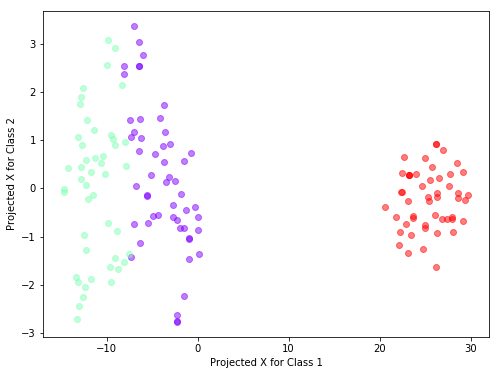

In [29]:
# 2D visualization
n_dimensions = 2
reduced_X = manifold.TSNE(n_components=n_dimensions, learning_rate=10, random_state=410).fit_transform(scaled_X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for lab, colr in zip((range(optimal_k)), iter(plt.cm.rainbow(np.linspace(0,1,optimal_k)))):  # color map
    ax.scatter(reduced_X[labels==lab, 0],
               reduced_X[labels==lab, 1],
               label=y_labels[lab],
               c=colr,
               alpha=0.5)  # alpha for transparency
    
ax.set_xlabel('Projected X for Class 1')
ax.set_ylabel('Projected X for Class 2')

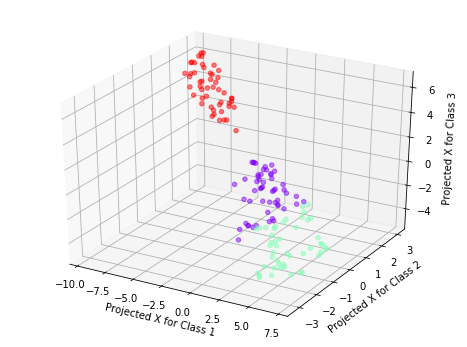

In [30]:
# 3D visualization
n_dimensions = 3
reduced_X = manifold.TSNE(n_components=n_dimensions, learning_rate=1, random_state=410).fit_transform(scaled_X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for lab, colr in zip((range(optimal_k)), iter(plt.cm.rainbow(np.linspace(0,1,optimal_k)))):  # color map
    ax.scatter(reduced_X[labels==lab, 0],
               reduced_X[labels==lab, 1],
               reduced_X[labels==lab, 2],
               label=y_labels[lab],
               c=colr,
               alpha=0.5)  # alpha for transparency
    
ax.set_xlabel('Projected X for Class 1')
ax.set_ylabel('Projected X for Class 2')
ax.set_zlabel('Projected X for Class 3')